# 题目一： 
#下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。


In [195]:
import pandas as pd
data =  pd.read_excel('sz50.xlsx',sheet_name = None,index_col='datetime')

In [196]:
data
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


# 题目二：
#读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值


In [197]:
import numpy as np
import pandas as pd
import talib as ta
symbol=['600036.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data['close']
data = pd.DataFrame(data_dict)
arr1 = np.array(data_dict[s])
ma10=ta.SMA(arr1,timeperiod=10)
print(ma10[-5:])

[108.35  108.741 109.176 110.102 111.666]


/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


# 题目三：
#将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来


/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


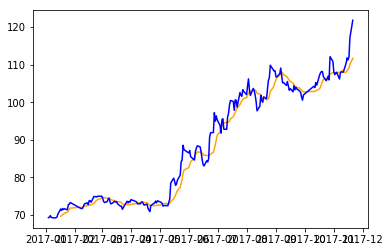

In [198]:
import pandas as pd
import numpy as np
import talib as tb
import matplotlib.pyplot as plt
 
file = pd.ExcelFile('sz50.xlsx')
data = pd.read_excel(file, sheetname = '600036.XSHG', index_col = 'datetime')
res = tb.MA(data.close.values, 10)
close = pd.Series(res, index = data.close.index)
plt.plot(close, color = 'orange')
plt.plot(data.close, color = 'blue')
plt.show()

# 题目四：
#用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

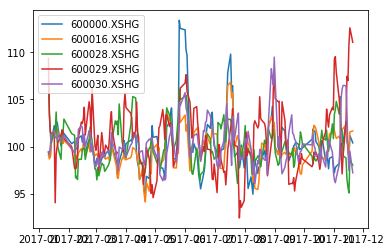

In [199]:
import pandas as pd
import numpy as np
import talib as tb
import matplotlib.pyplot as plt
 
file_path = 'sz50.xlsx' 
file = pd.ExcelFile(file_path)
data = pd.read_excel(file_path, sheet_name = None, index_col = 'datetime')
date_index = pd.read_excel(file_path, index_col = 'datetime').index
columns_index = pd.read_excel(file_path).columns
new_dict = {}
for key,value in data.items():
    try:
        index = value.index
        new_dict[key] = pd.Series(tb.ROCR100(value.close.values, timeperiod = 5), index = index)
    except AttributeError:
        pass
df = pd.DataFrame(new_dict)
list = df.columns.values.tolist()
for i in range(5):
    plt.plot(df[list[i]],label = list[i])
plt.legend()
plt.show()

# 题目五：
#用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式


In [200]:
import pandas as pd
import numpy as np
import talib as tb
import matplotlib.pyplot as plt
 
file_path = 'sz50.xlsx' 
file = pd.ExcelFile(file_path)
data = pd.read_excel(file_path, sheet_name = None, index_col = 'datetime')
date_index = pd.read_excel(file_path, index_col = 'datetime').index
columns_index = pd.read_excel(file_path).columns
new_dict = {}
for key,value in data.items():
    try:
        new_dict[key] = tb.abstract.MACD(value,10)
    except:
        pass
    
p = pd.Panel(new_dict)
q = p.transpose(2,1,0)
qq = q.to_frame()
print(qq.head())

Empty DataFrame
Columns: []
Index: []


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/pandas/core/panel.py:1268: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  return super(Panel, self).transpose(*axes, **kwargs)
